In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
import statsmodels.graphics.api as smg
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import seaborn as sns
import numpy as np
import statsmodels

df = pd.read_csv('addmulti.txt')
df

,x,y
0,1,6.13
1,2,7.79
2,3,8.45
3,4,8.66
4,5,6.92
5,6,6.42
6,7,5.23
7,8,4.05
8,9,5.40
9,10,5.87


In [16]:
print('Описательная статитсика')
statsmodels.stats.descriptivestats.describe(df.y)

Описательная статитсика


,y
nobs,28.000000
missing,0.000000
mean,7.290714
std_err,0.056083
upper_ci,7.400634
lower_ci,7.180794
std,1.570315
iqr,2.685000
iqr_normal,1.990393
mad,1.360051


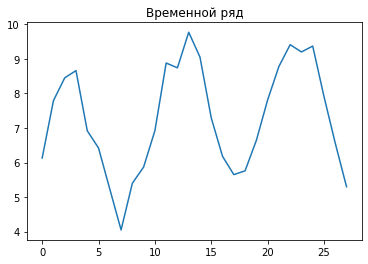

In [2]:
df.y.plot()
plt.title('Временной ряд');

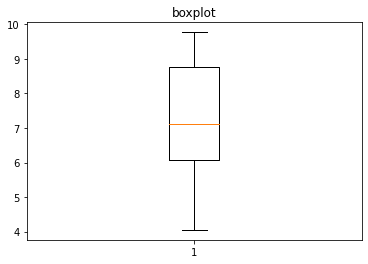

In [3]:
plt.figure(figsize=(6, 4))
plt.boxplot(df.y);
plt.title('boxplot');

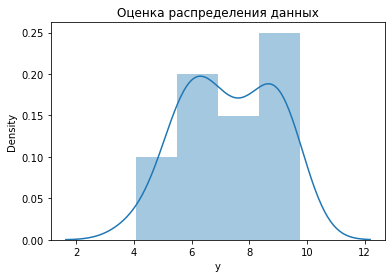

In [4]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
plt.figure(figsize=(6, 4))
sns.distplot(df.y)
plt.title('Оценка распределения данных');

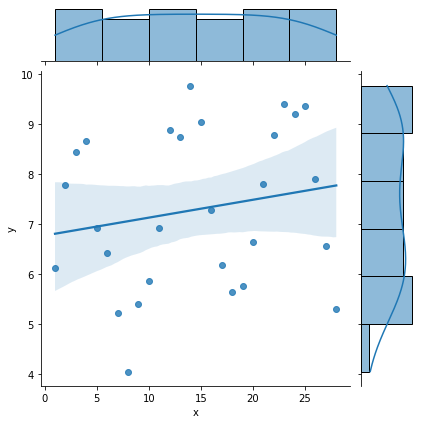

In [5]:
sns.jointplot(data=df, x='x', y='y', kind='reg')

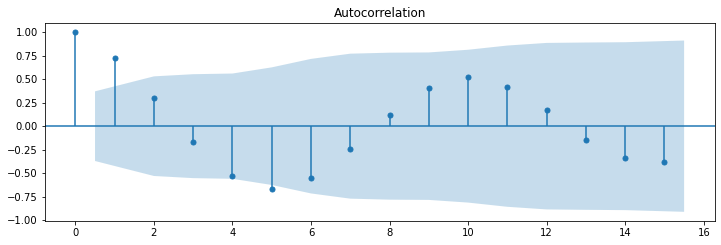

In [20]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.y.values.squeeze(), ax=ax1)

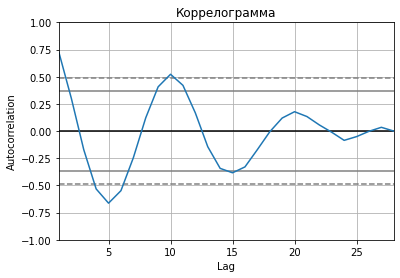

In [19]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.y);
plt.title('Коррелограмма');

* Временной ряд – это ряд значений показателя за последовательные промежутки времени.
* Для определения структуры временного ряда следует строить автокорреляционную функцию.
* Автокорреляция– корреляционная связь между последовательными уровнями одного и того же ряда динамики (сдвинутыми на определенный промежуток времени L - лаг)
* Лаг (сдвиг во времени) определяет порядок коэффициента автокорреляции. Если L=1, то имеем коэффициент автокорреляции 1-ого порядка, если L=2, то коэффициент автокорреляции 2-ого порядка и т.д.(максимальный порядок коэффициента автокорреляции равен n/4)
* Нужно определить лаг (L), при котором автокорреляция наиболее высокая, таким образом определяется структура временного ряда. 

- 1 Если самое большое значение - коэффициент автокорреляции первого порядка, то ряд содержит только тенденцию. 
- 2 Если наиболее высокий коэффициент автокорреляции t-L порядка L, то ряд содержит колебания периодом L. 
- 3 Если ни один из коэф. автокорреляции (t-L) не является значимым, то:
- ряд не содержит ни тенденции, ни циклических колебаний, его уровень определяется только случайной составляющей; 
- или ряд содержит довольно сильную, причем нелинейную тенденцию

<h4> В этом случае наиболее высокий - коэфф. автокореляции 5 порядка, это значит, что период колебаний = 5

Линейная регрессия (метод - МНК)

In [7]:
result = smf.ols('x ~ y', data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9475
Date:                Sat, 28 May 2022   Prob (F-statistic):              0.339
Time:                        04:16:27   Log-Likelihood:                -97.724
No. Observations:                  28   AIC:                             199.4
Df Residuals:                      26   BIC:                             202.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3384      7.520      0.976      0.3

In [106]:
from statsmodels.compat import lzip
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(result.resid)
lzip(name, test) #проверка нормальности остатков

[('Jarque-Bera', 1.0598226327061573),
 ('Chi^2 two-tail prob.', 0.5886571716283577),
 ('Skew', 0.019481773758595302),
 ('Kurtosis', 2.0476863744399663)]

In [110]:
name = ["Chi^2", "Two-tail probability"]
test = sms.omni_normtest(result.resid)
lzip(name, test)

[('Chi^2', 1.7910328987633244), ('Two-tail probability', 0.4083966279817103)]

In [109]:
np.linalg.cond(result.model.exog) #мультиколлинеарность

36.633960445087

In [111]:
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(result.resid, result.model.exog)
lzip(name, test) #Гетероскедастичность остатков

[('Lagrange multiplier statistic', 0.053411062763280004),
 ('p-value', 0.8172306395644544),
 ('f-value', 0.04969077388886418),
 ('f p-value', 0.8253442317225514)]

In [112]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(result.resid, result.model.exog)
lzip(name, test)

[('F statistic', 1.0456074396194832), ('p-value', 0.4698479435407832)]

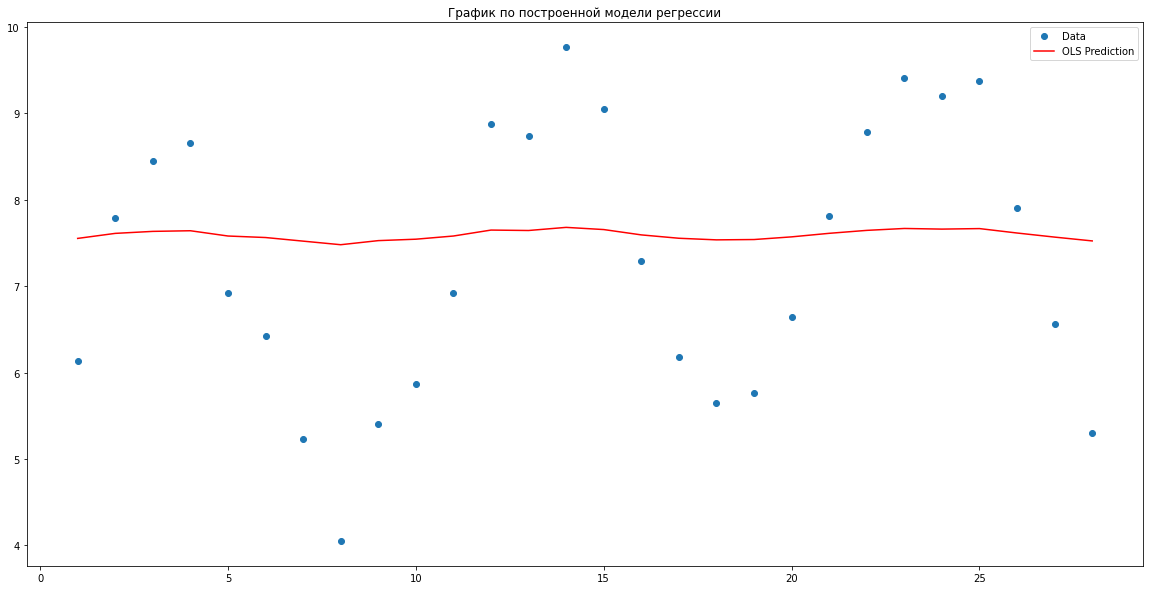

In [8]:
ypred = result.predict(df.y/28)
fig, ax = plt.subplots()
ax.plot(df.x, df.y, "o", label="Data")
ax.plot(df.x, ypred, "r", label="OLS Prediction")
ax.legend(loc="best");
plt.title('График по построенной модели регрессии');

* <h2>Аддитивная модель Y = T + S + E

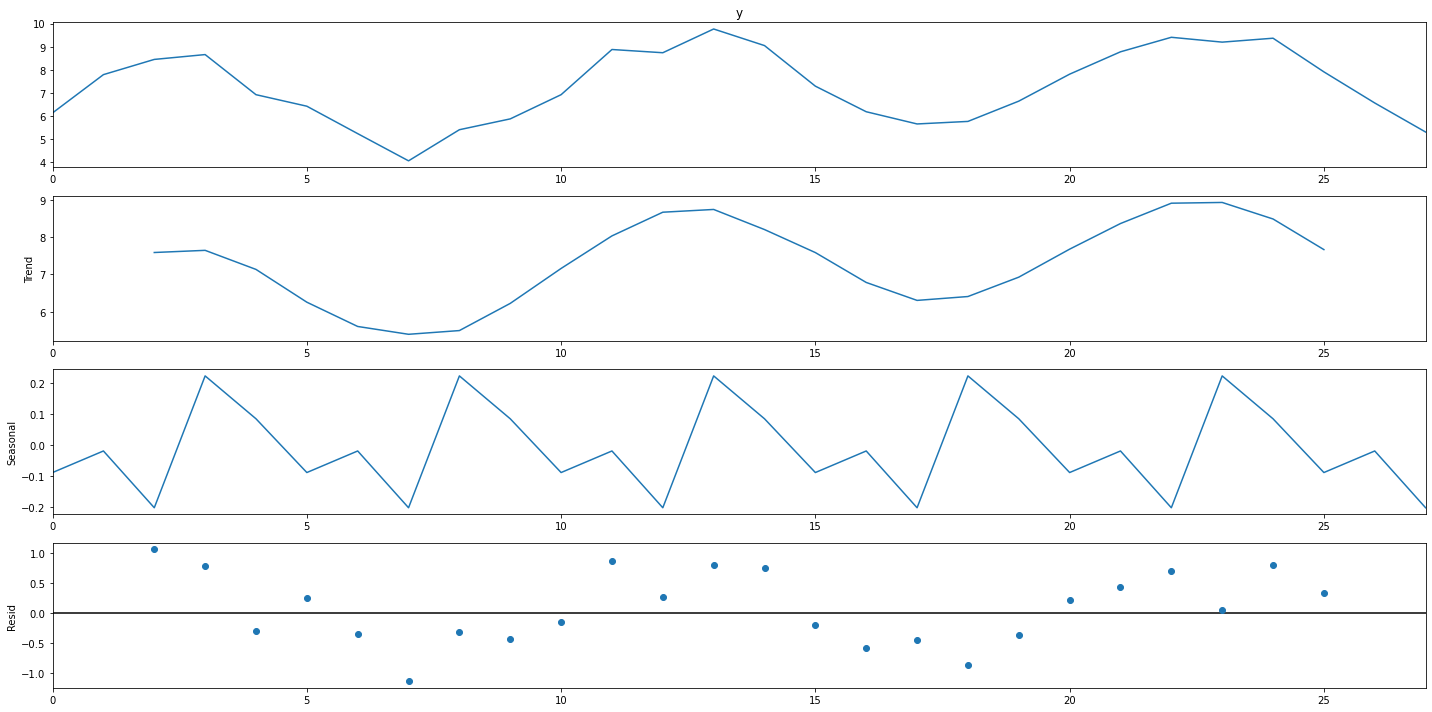

In [9]:
import statsmodels.api as sm
plt.rcParams["figure.figsize"] = (20,10)
sm.tsa.seasonal_decompose(df.y, period=5, model='additive').plot()
result = sm.tsa.stattools.adfuller(df.y)
plt.show()

* <h2>Мультипликативная модель Y = T * S * E

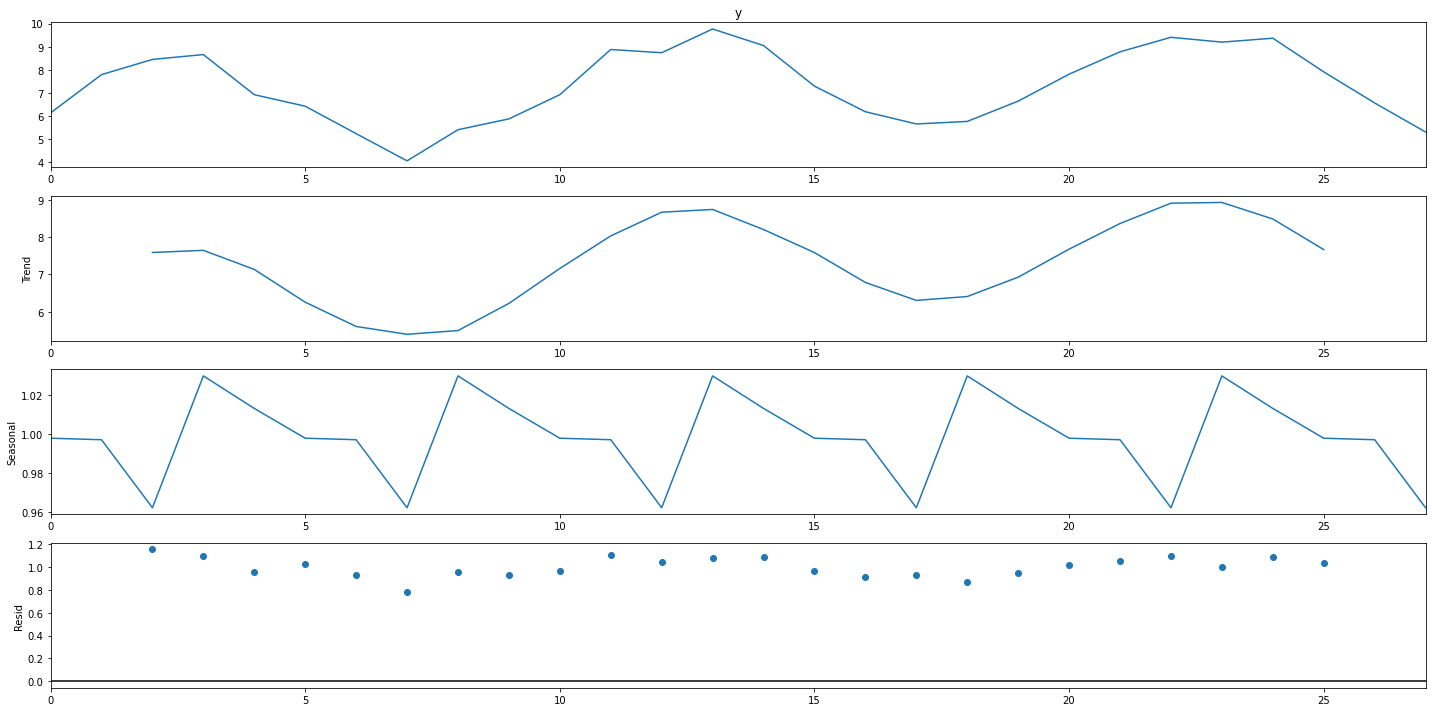

In [10]:
plt.rcParams["figure.figsize"] = (20,10)
sm.tsa.seasonal_decompose(df.y, period=5, model='multiplicative').plot()
result = sm.tsa.stattools.adfuller(df.y)
plt.show()

<h5>Амплитуда сезонных колебаний постоянная, поэтому следует выбрать аддитивную модель<h5>

Модель авторегресии для прогноза

In [11]:
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
mod = AutoReg(df.y, 5, old_names=False)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   28
Model:                     AutoReg(5)   Log Likelihood                 -13.547
Method:               Conditional MLE   S.D. of innovations              0.436
Date:                Sat, 28 May 2022   AIC                             -1.051
Time:                        04:17:55   BIC                             -0.706
Sample:                             5   HQIC                            -0.964
                                   28                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8814      1.084      3.581      0.000       1.757       6.006
y.L1           0.8572      0.144      5.939      0.000       0.574       1.140
y.L2           0.1412      0.171      0.825      0.4

In [12]:
res = mod.fit(cov_type="HC0")
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   28
Model:                     AutoReg(5)   Log Likelihood                 -13.547
Method:               Conditional MLE   S.D. of innovations              0.436
Date:                Sat, 28 May 2022   AIC                             -1.051
Time:                        04:17:58   BIC                             -0.706
Sample:                             5   HQIC                            -0.964
                                   28                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8814      0.797      4.870      0.000       2.319       5.443
y.L1           0.8572      0.102      8.369      0.000       0.656       1.058
y.L2           0.1412      0.156      0.903      0.3

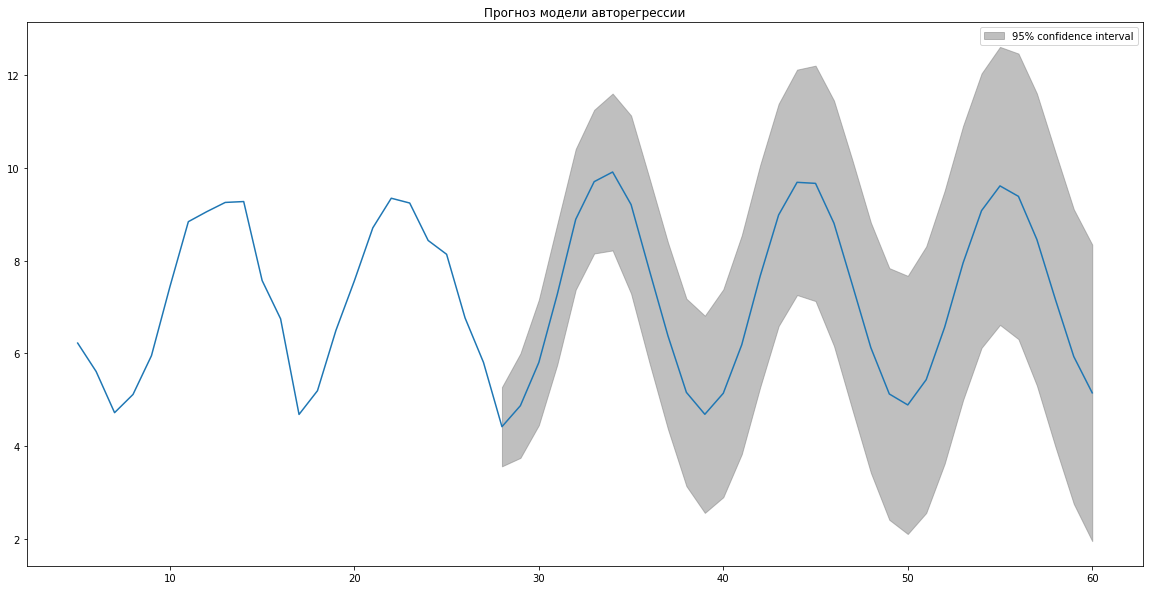

In [14]:
fig = res.plot_predict(0,60)
plt.title('Прогноз модели авторегрессии');

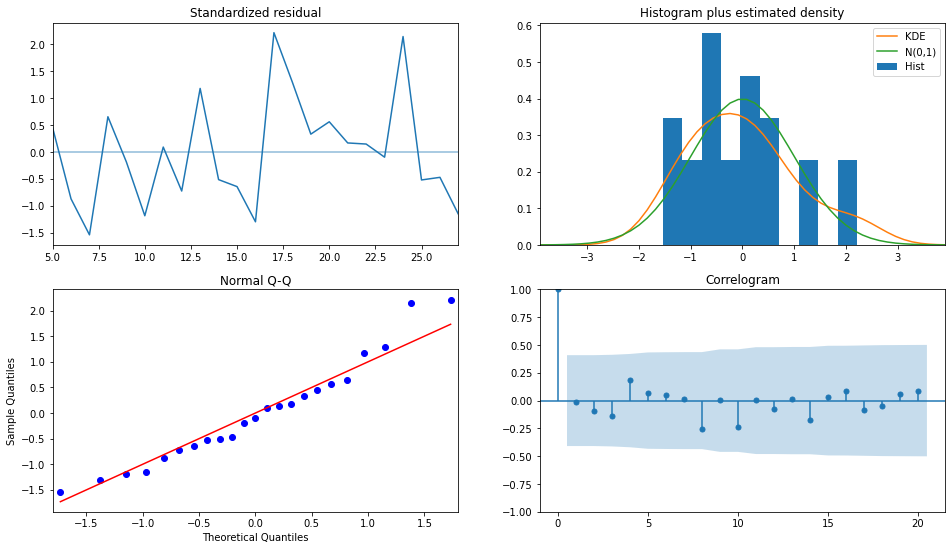

In [15]:
warnings.filterwarnings("ignore", category=UserWarning)
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(fig=fig, lags=20)

In [17]:
model = sm.OLS(df.y,df.x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.763
Model:                            OLS   Adj. R-squared (uncentered):              0.754
Method:                 Least Squares   F-statistic:                              86.98
Date:                Sat, 28 May 2022   Prob (F-statistic):                    6.20e-10
Time:                        04:18:32   Log-Likelihood:                         -75.805
No. Observations:                  28   AIC:                                      153.6
Df Residuals:                      27   BIC:                                      154.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------